## Q1
### (a)

**Input**: $\bold{a} \in \mathbb{R}^{n-1}, \bold{b} \in \mathbb{R}^{n}, \bold{v}\in \mathbb{R}^{n-1}$

**Output**: $\bold{l} \in \mathbb{R}^{n-1}, \bold{u} \in \mathbb{R}^{n}, \bold{v}\in \mathbb{R}^{n-1}$
1. $\bold{l} = \bold{0}$
1. for $i = 1, \cdots, n$
    - if $i \neq n$:
        - $v_i = c_i$
    - if $i > 1$:
        - $l_i = a_i / u_{i-1}$
    - $u_i = b_i - l_i v_{i-1}$
1. endfor

### (b)
$C(n) = 3n - 1$

There are $n$ interations. For each iteration, calculation of $l_i$ takes one operation, $u_i$ takes two operations, and $v_i$ takes none. The first iteration does not calculate $l_i$ and $v_i$. Therefore, the total number of operations is $3n - 1$.

### (c)

In [92]:
import numpy as np
def LUtri(a, b, c):
    """
    LU factorisation of a tridiagonal matrix
    Input:
        a, b, c: numpy arrays of size n-1, n, n-1
    Output:
        l, u, v: numpy arrays of size n-1, n, n-1
    """

    # a[i] = a_{i+2}
    # b[i] = b_{i+1}
    # c[i] = c_{i+1}
    # find dimension of b
    n = b.size

    # initialise l, u, v
    l = np.zeros(n-1) # we have l[i] = l_{i+2}
    u = np.zeros(n) # u[i] = u_{i+1}
    v = np.zeros(n-1) #v[i] = v_{i+1}

    for i in range(1,n+1):
        u[i-1] = b[i-1] - l[i-2]*v[i-2]
        if i != n:
            v[i-1] = c[i-1]
        if i > 1:
            l[i-2] = a[i-2]/u[i-2]
        u[i-1] = b[i-1] - l[i-2]*v[i-2]
    
    return l, u, v


In [93]:
import numpy as np
# These are some auxiliary functions
def L_from_LUtri(l):
    """ 
    input:
        n dimensional vector l from LUtri
    output:
        n*n matrix L as numpy array, that is L = diag(1) + diag(l, -1)
    """

    return np.diag(np.ones(len(l)+1), 0) + np.diag(l, -1)

def U_fromLUtri(u, v):
    """ 
    input: 
        n dimensional vector u from LUtri
        n dimensional vector v from LUtri
    output:
        n*n matrix U as numpy array, that is U = diag(u) + diag(v, 1)
    """
    return np.diag(u, 0) + np.diag(v, 1)


A = 


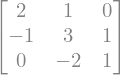

L = 


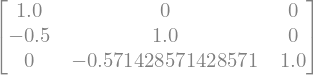

U = 


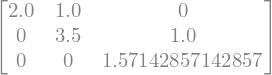

LU = 


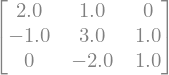

In [94]:
import numpy as np
from sympy import init_printing, Matrix
init_printing()
# construct A as instructed
A = np.array([[2, 1, 0], [-1, 3, 1], [0, -2, 1]])

# extract the diagonals
b = np.diag(A)
a = np.diag(A, k=-1)
c = np.diag(A, k=1)

# call LUtri
l, u, v = LUtri(a, b, c)

# construct L and U from the output of LUtri
L = L_from_LUtri(l)
U = U_fromLUtri(u, v)

#check that A = LU
print("A = ")
display(Matrix(A))
print("L = ")
display(Matrix(L))
print("U = ")
display(Matrix(U))
print("LU = ")
display(Matrix(L@U))